In [97]:
import pandas as pad
import numpy as nup
import glob
import soundfile 
import os 
import sys

In [98]:
import librosa 
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [99]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [100]:
from IPython.display import Audio

In [101]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [102]:
Ravdess_Data = "G:\\speech_Data\\ravdess-data\\"

In [103]:
ravdessDirectoryList = os.listdir(Ravdess_Data)
fileEmotion = []
filePath = []
for dir in ravdessDirectoryList:
    actor = os.listdir(Ravdess_Data + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        fileEmotion.append(int(part[2]))
        filePath.append(Ravdess_Data+dir+'/'+file)
emotion_df = pad.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pad.DataFrame(filePath, columns= ['Path'])
Ravdess_df = pad.concat([emotion_df, path_df], axis=1)


In [104]:
Ravdess_df.Emotions.replace({1: 'neutral', 
                             2: 'calm', 
                             3: 'happy', 
                             4: 'sad', 
                             5: 'angry', 
                             6: 'fear', 
                             7: 'disgust', 
                             8: 'surprise'}, 
                            inplace=True)

Ravdess_df.head()

,Emotions,Path
0,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
1,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
2,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
3,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
4,calm,G:\speech_Data\ravdess-data\Actor_01/03-01-02-...


In [105]:
dataPath = pad.concat([Ravdess_df], axis = 0)
dataPath.to_csv("data_path.csv", index=False)
dataPath.head()

,Emotions,Path
0,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
1,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
2,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
3,neutral,G:\speech_Data\ravdess-data\Actor_01/03-01-01-...
4,calm,G:\speech_Data\ravdess-data\Actor_01/03-01-02-...


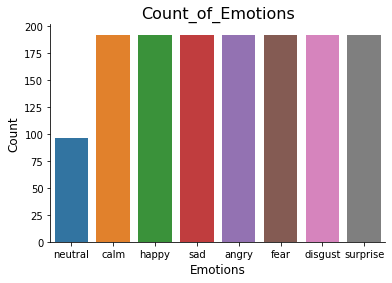

In [106]:
mplt.title('Count_of_Emotions', size = 16)
sbn.countplot(x=Ravdess_df['Emotions'])
mplt.ylabel('Count', size = 12)
mplt.xlabel('Emotions', size = 12)
sbn.despine(top = True, right=True, left=False, bottom=False)
mplt.show()

In [107]:
def createWaveplot(data, sr, e):
    mplt.figure(figsize=(110, 3))
    mplt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr = sr)
    mplt.show()

In [108]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    mplt.figure(figsize=(12, 3))
    mplt.title('Spectrogram for audio with {} emotion'.format(e), size = 25)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    mplt.colorbar()
    

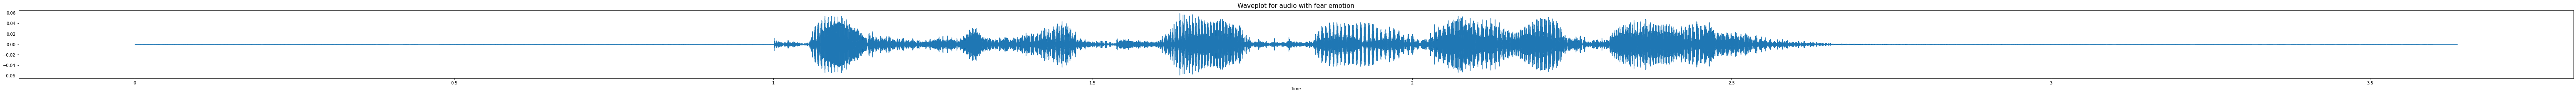

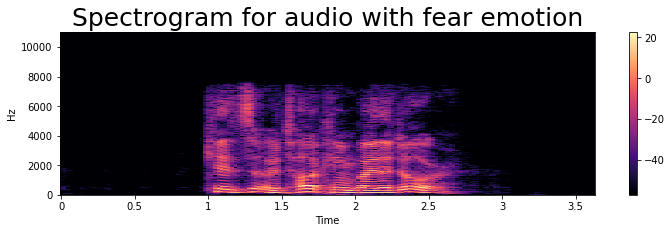

In [109]:
emotion = 'fear'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

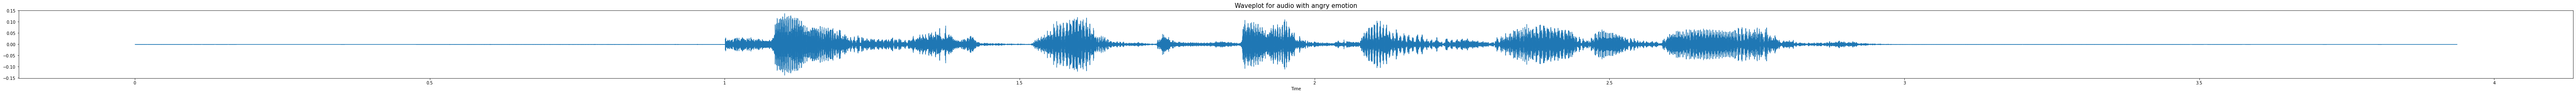

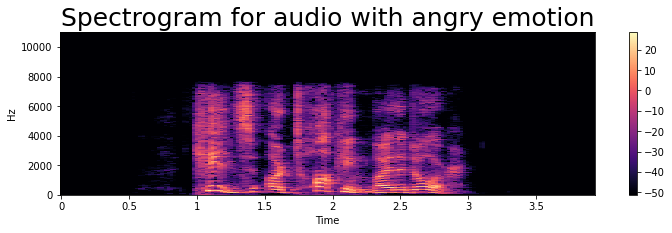

In [110]:
emotion = 'angry'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

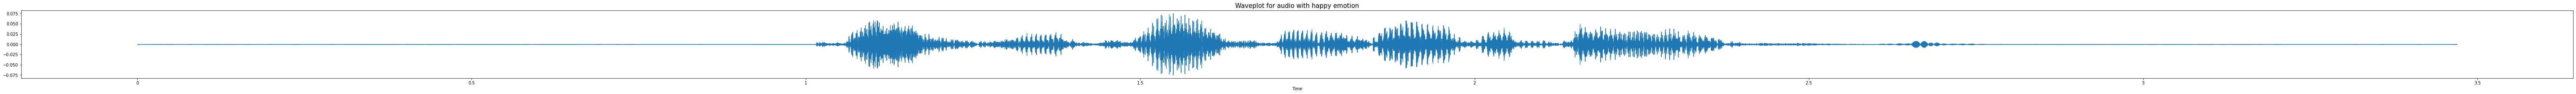

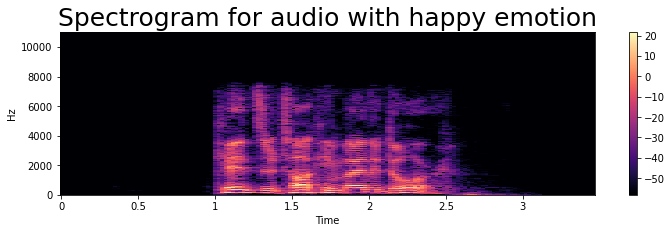

In [111]:
emotion = 'happy'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

In [112]:
def noise(data):
    noiseAmp = 0.035*nup.random.uniform()*nup.amax(data)
    data = data + noiseAmp*nup.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shiftRange = int(nup.random.uniform(low=-5, high = 5)* 1000)
    return nup.roll(data, shiftRange)

def pitch(data, samplingRate, pitchFactor = 0.7):
    return librosa.effects.pitch_shift(data, samplingRate, pitchFactor)


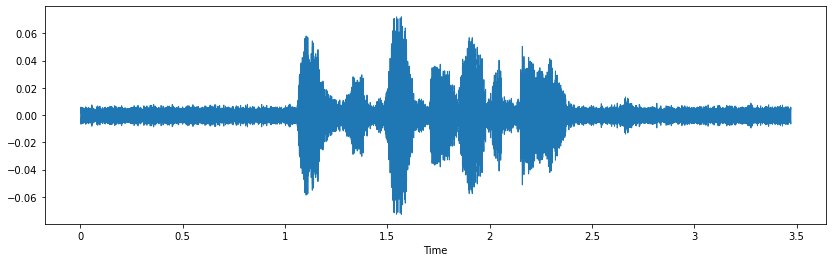

In [113]:
x = noise(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr = samplingRate)
Audio(x, rate = samplingRate)

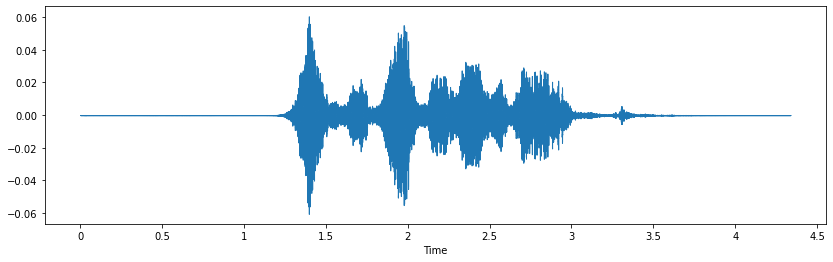

In [114]:
x = stretch(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr = samplingRate)
Audio(x, rate = samplingRate)

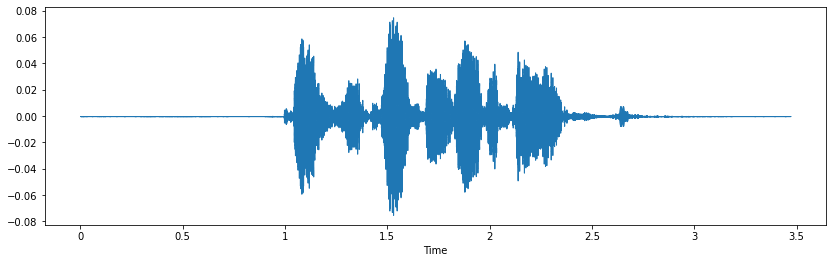

In [115]:
x = shift(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr = samplingRate)
Audio(x, rate = samplingRate)

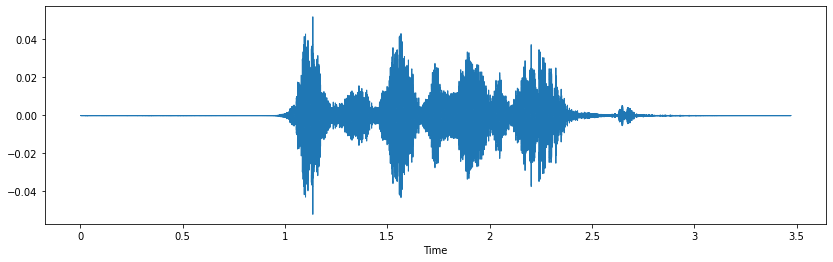

In [116]:
x = pitch(data, samplingRate)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr = samplingRate)
Audio(x, rate = samplingRate)

In [117]:
def extractFeature(fileName, mfcc, chroma, mel):
    with soundfile.SoundFile(fileName) as soundFile:
        X = soundFile.read(dtype="float32")
        samplingRate = soundFile.samplerate
        if chroma:
            stft=nup.abs(librosa.stft(X))
        result = nup.array([])
        
        if mfcc:
            mfccs = nup.mean(librosa.feature.mfcc(y=X, sr = samplingRate, n_mfcc = 40).T, axis=0)
            result=nup.hstack((result, mfccs))
        if chroma:
            chroma=nup.mean(librosa.feature.chroma_stft(S=stft, sr = samplingRate).T, axis=0)
            result=nup.hstack((result, chroma))
        if mel:
            mel = nup.mean(librosa.feature.melspectrogram(X, sr= samplingRate).T, axis=0)
            result=nup.hstack((result, mel))
            
    return result

In [118]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

observedEmotions = ['calm', 'happy', 'fearful', 'disgust']

In [119]:
def loadData(test_size = 0.2):
    x,y = [],[]
    for file in glob.glob("G:\\speech_Data\\ravdess-data\\Actor_*\\*.wav"):
        fileName = os.path.basename(file)
        emotion1 = emotions[fileName.split("-")[2]]
        if emotion1 not in observedEmotions:
            continue
        
        feature= extractFeature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion1)
    return train_test_split(nup.array(x), y, test_size=test_size, random_state=9)


In [120]:
xTrain, xTest, yTrain, yTest = loadData(test_size = 0.23)

In [121]:
print((xTrain.shape[0], xTest.shape[0]))

(591, 177)


In [122]:
print(f'Features extracted: {xTrain.shape[1]}')

Features extracted: 180


In [123]:
model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08,
                      hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [124]:
model.fit(xTrain, yTrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [125]:
expected_Of_y = yTest
yPred = model.predict(xTest)

In [126]:
print(metrics.confusion_matrix(expected_Of_y, yPred))

[[43  7  2  1]
 [ 3 37  1  5]
 [ 0  4 27  4]
 [ 4  5  6 28]]


In [127]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

        calm       0.86      0.81      0.83        53
     disgust       0.70      0.80      0.75        46
     fearful       0.75      0.77      0.76        35
       happy       0.74      0.65      0.69        43

    accuracy                           0.76       177
   macro avg       0.76      0.76      0.76       177
weighted avg       0.77      0.76      0.76       177



In [128]:
accuracy = accuracy_score(y_true=yTest, y_pred=yPred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 76.27%
